In [1]:
#Imports
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt 
import scipy

In [22]:
#Load TNG
basePath = 'D:/Buhv2020Work/Illustris-3/output'
snapshot_ind = 66
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
sub_halo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
#print("\nSubHalo Group File Keys: ")
#print('\n'.join(list(sub_halo_grp.keys())))

In [23]:
#Galaxy info
subhalo_grp_fields = ['SubhaloFlag','SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloLen', 
                   'SubhaloLenType', 'SubhaloMassInRadType', 'SubhaloMassType',
                      'SubhaloStellarPhotometrics','SubhaloStellarPhotometricsRad', 'SubhaloWindMass']

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind, fields=subhalo_grp_fields)

[[  615.8283  27671.998   18748.514  ]
 [  615.12933 27672.145   18747.879  ]
 [  615.0295  27671.059   18747.842  ]
 ...
 [  547.99927 27750.59    18796.56   ]
 [  562.85443 27650.84    18746.89   ]
 [  580.862   27702.14    18730.902  ]]
(1692, 3)


<Figure size 432x288 with 0 Axes>

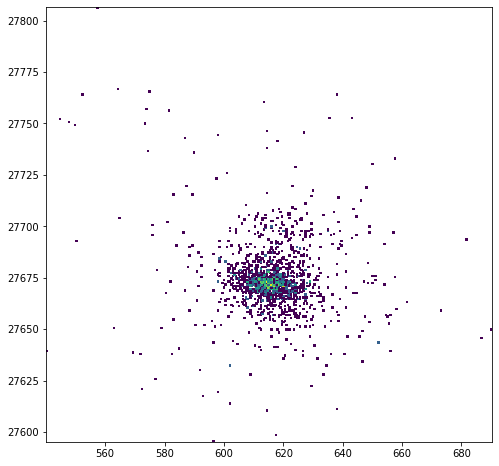

In [4]:
stars = il.snapshot.loadSubhalo(basePath, 66, 5, 'stars', ['Coordinates'])
print(stars)
print(stars.shape)

import matplotlib.colors as colors

plt.figure(1)
plt.figure(figsize=(8, 8))
plt.hist2d(stars[:,0], stars[:,1], norm=colors.LogNorm(), bins=300)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


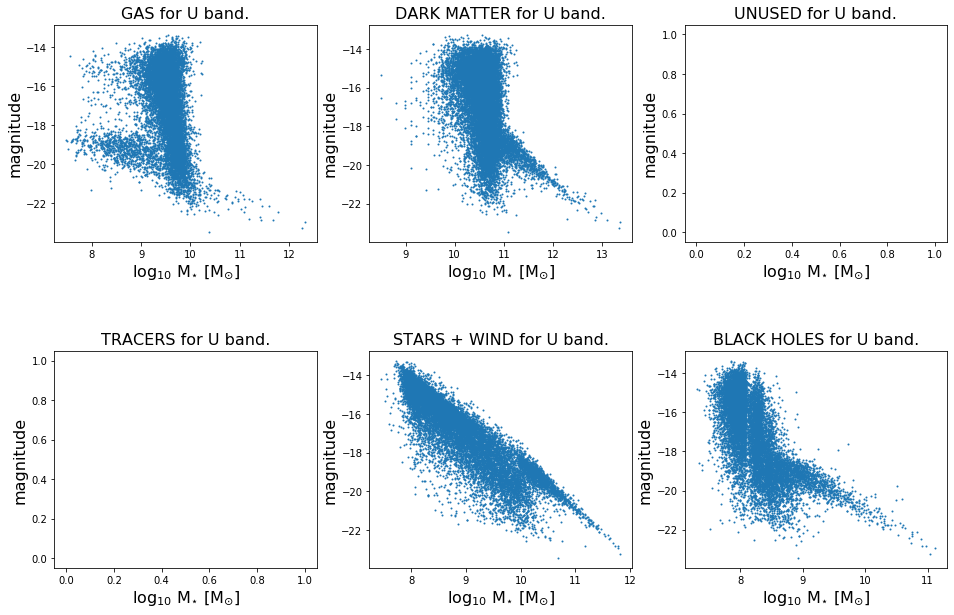

In [5]:
#Plotting mass vs magnitude
mass_types = ['GAS', 'DARK MATTER', 'UNUSED', 'TRACERS', 'STARS + WIND', 'BLACK HOLES']
bands_names = ['U', 'B', 'V','K', 'g', 'r', 'i', 'z']
for bands in range(1): #Look basically identical, so just pick 1
    fig, ax = plt.subplots(2, 3)
    fig.set_size_inches(16,10)
    plt.subplots_adjust(hspace = 0.5)
    for i in range(6):
        mag = subhalo_grp['SubhaloStellarPhotometrics'][:,bands]
        subhalomass = np.log10(subhalo_grp['SubhaloMassInRadType'][:,i]*1e10)
        ax[i//3][i%3].scatter(subhalomass, mag, s=1)
        ax[i//3][i%3].set_xlabel( '$\log_{10}\ \mathrm{M}_{\star}\ [\mathrm{M}_{\odot}]$', fontsize = 16 )
        ax[i//3][i%3].set_ylabel('magnitude', fontsize = 16)
        ax[i//3][i%3].set_title(mass_types[i]+ ' for ' +bands_names[bands]+ ' band.' , fontsize=16)

In [10]:
len(mag[mag>8e+36])
len(mag)

118820

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'magnitude')

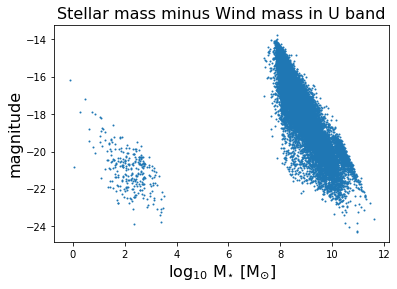

In [34]:
mag = subhalo_grp['SubhaloStellarPhotometrics'][:,0]
starmass=np.nan_to_num(np.log10(subhalo_grp['SubhaloWindMass']*1e10), copy=False, nan=0, posinf=0, neginf=0)
subhalomass = np.log10(subhalo_grp['SubhaloMassInRadType'][:,4]*1e10)-starmass
plt.scatter(subhalomass, mag, s=1)
plt.title("Stellar mass minus Wind mass in U band", fontsize = 16)
plt.xlabel( '$\log_{10}\ \mathrm{M}_{\star}\ [\mathrm{M}_{\odot}]$', fontsize = 16 )
plt.ylabel('magnitude', fontsize = 16)

(131349, 8)
(131761, 8)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0, 0.5, 'magnitude')

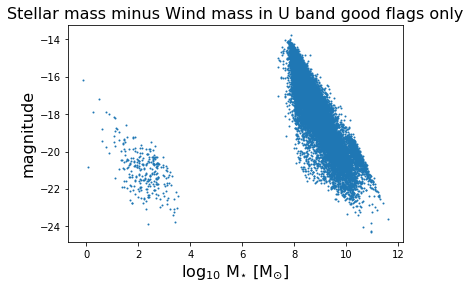

In [8]:
print(subhalo_grp['SubhaloStellarPhotometrics'][subhalo_grp['SubhaloFlag']].shape)
print(subhalo_grp['SubhaloStellarPhotometrics'].shape)
mask=subhalo_grp['SubhaloFlag']

mag = subhalo_grp['SubhaloStellarPhotometrics'][:,0][mask]
windmass=np.nan_to_num(np.log10(subhalo_grp['SubhaloWindMass'][mask]*1e10), copy=False, nan=0, posinf=0, neginf=0)
subhalomass = np.log10(subhalo_grp['SubhaloMassInRadType'][:,4][mask]*1e10)-windmass
plt.scatter(subhalomass, mag, s=1)
plt.title("Stellar mass minus Wind mass in U band good flags only", fontsize = 16)
plt.xlabel( '$\log_{10}\ \mathrm{M}_{\star}\ [\mathrm{M}_{\odot}]$', fontsize = 16 )
plt.ylabel('magnitude', fontsize = 16)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0, 0.5, 'magnitude')

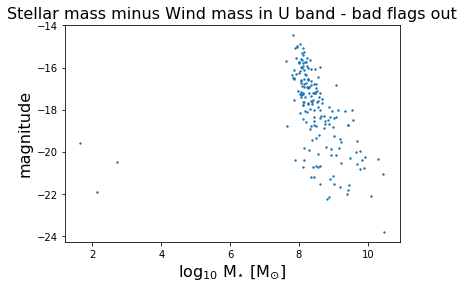

In [26]:
mask= ~subhalo_grp['SubhaloFlag']
mag = subhalo_grp['SubhaloStellarPhotometrics'][:,0][mask]
windmass=np.nan_to_num(np.log10(subhalo_grp['SubhaloWindMass'][mask]*1e10), copy=False, nan=0, posinf=0, neginf=0)
subhalomass = np.log10(subhalo_grp['SubhaloMassInRadType'][:,4][mask]*1e10)-windmass
plt.scatter(subhalomass, mag, s=2)
plt.title("Stellar mass minus Wind mass in U band - bad flags out", fontsize = 16)
plt.xlabel( '$\log_{10}\ \mathrm{M}_{\star}\ [\mathrm{M}_{\odot}]$', fontsize = 16 )
plt.ylabel('magnitude', fontsize = 16)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


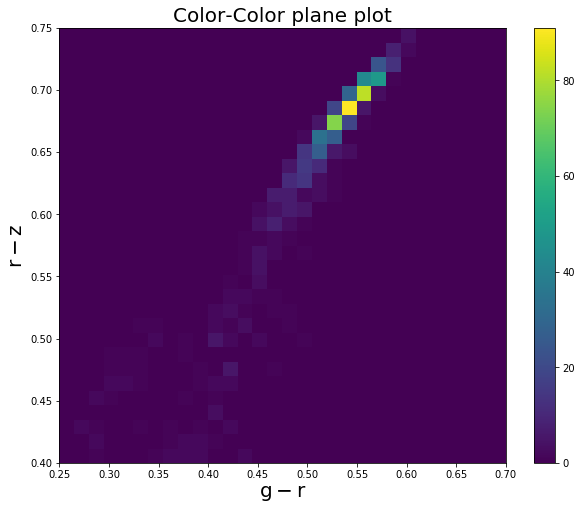

In [27]:
#colorspace comparison
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

#subhalomass = np.array(np.log10(subhalo_grp['SubhaloMassInRadType'][:,4]*1e10))
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
flag = np.array(subhalo_grp['SubhaloFlag'])

mask= np.logical_and(flag,subhalomass>11)
mag = subhalo_grp['SubhaloStellarPhotometrics'][mask]
g_minus_r = mag[:,4]-mag[:,5]
r_minus_z = mag[:,5]-mag[:,7]


heights, gmr, rmz = np.histogram2d(g_minus_r,r_minus_z,bins=50)
plt.hist2d(r_minus_z, g_minus_r , bins = 30, cmap='viridis', range=[[0.25, 0.7], [0.40, 0.75]])
plt.colorbar()
"""
gmr = gmr - 3*0.026584281921386732
rmz = rmz + 3*0.02789093017578126
#levels = [0,2,10,20,40,60,80,100]
levels = np.linspace(0.2, 100,num=6)
ax.contour(gmr[0:50], rmz[0:50], heights, levels=levels) #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
"""
#ax.scatter(r_minus_z, g_minus_r, s=1)

ax.set_xlabel("$\mathrm{g-r}$", fontsize = 20)
ax.set_ylabel("$\mathrm{r-z}$", fontsize = 20)
ax.set_title("Color-Color plane plot", fontsize = 20)
plt.show()

#MATCH MEAN MASS OF PARENT HALO
#look at other illustris papers for color-color plots  

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


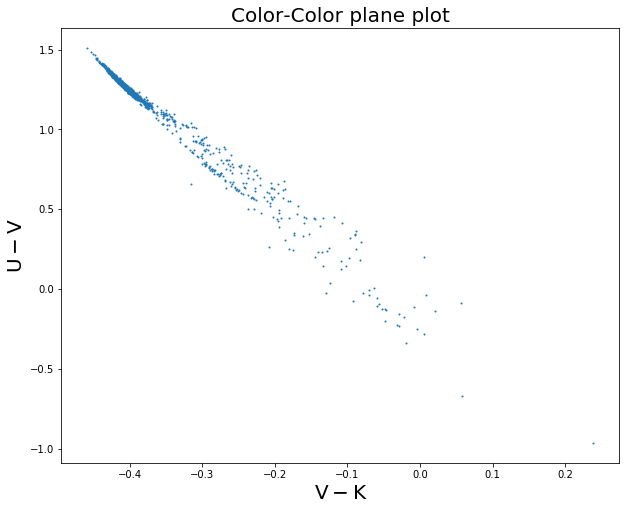

In [26]:
#colorspace comparison
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

#subhalomass = np.array(np.log10(subhalo_grp['SubhaloMassInRadType'][:,4]*1e10))
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
flag = np.array(subhalo_grp['SubhaloFlag'])

mask= np.logical_and(flag,subhalomass>11)
mag = subhalo_grp['SubhaloStellarPhotometrics'][mask]
u_minus_v = mag[:,0]-mag[:,2]
v_minus_K= mag[:,2]-mag[:,4]
ax.scatter(v_minus_K,u_minus_v, s=1)

ax.set_ylabel("$\mathrm{U-V}$", fontsize = 20)
ax.set_xlabel("$\mathrm{V-K}$", fontsize = 20)
ax.set_title("Color-Color plane plot", fontsize = 20)
plt.show()

#MATCH MEAN MASS OF PARENT HALO
#look at other illustris papers for color-color plots  